In [ ]:
# from pathlib import Path
# import os, kagglehub

# project_root = Path.cwd()
# data_dir = project_root / "data"
# data_dir.mkdir(parents=True, exist_ok=True)

# os.environ["KAGGLEHUB_CACHE"] = str(data_dir)

# dataset_path = kagglehub.dataset_download("zlatan599/mushroom1")

100%|██████████| 11.3G/11.3G [09:58<00:00, 20.2MB/s]  

Extracting files...


# Benchmark: Training a CNN with the mushroom dataset

The base code was adopted from the pytorch tutorial for building an image classifier: https://docs.pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Afterwards, these three tutorials from datacamp, topcoder and towardsscience were used to adapt the code and tune the hyperparameters.
- https://www.datacamp.com/tutorial/pytorch-cnn-tutorial?dc_referrer=https%3A%2F%2Fwww.google.com%2F
- https://www.topcoder.com/blog/image-classification-with-pytorch
- https://towardsdatascience.com/how-to-apply-a-cnn-from-pytorch-to-your-images-18515416bba1/

### Step 1: Check if GPU is available and set the device variable

In [1]:
from src.cnn import set_device

device = set_device()

CUDA available: True
CUDA version (torch): 13.0
device_count: 1
CUDA_VISIBLE_DEVICES: None
Using device: cuda


### Step 2: Use function __get_transform_data__ which uses PyTorch utilities for image datasets, transforms, and data loading.

In [9]:
from src.cnn import get_transform_data

train_data, val_data, test_data = get_transform_data()

104088
83270 10408 10410


### Step 3: Define the PyTorch CNN model

In [10]:
from src.cnn import Net, ResBlock

net = Net()
net = net.to(device)

### Step 4: Define Loss function and optimizer

In [11]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Step 4: Use function for training the model

[1,   100] loss: 0.2310683870
[1,   200] loss: 0.2067781649
[1,   300] loss: 0.1950163984


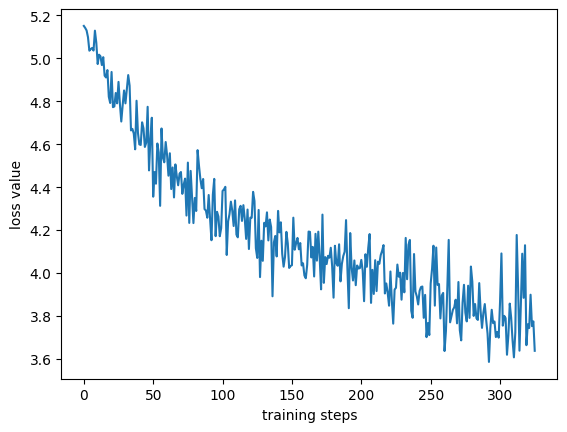

Finished Training


In [12]:
from src.cnn import train_net

net = train_net(1, criterion, optimizer, device, net, train_data)

### Step 5: Use function for evaluating the trained model

In [13]:
from src.cnn import evaluate

evaluate(net, test_data, device)

Accuracy on 10410 test images: 21.17%


21.17195004803074

### Summary of optimization steps

In [14]:
import pandas as pd

data = {
    "Cycle 1": {
        "Changes": "Resize((256, 224)), 2 Epochs",
        "Accuracy (%)": 7.0
    },
    "Cycle 2": {
        "Changes": "Resize((256, 224)) + Normalize((0.5,0.5,0.5)), 2 Epochs",
        "Accuracy (%)": 7.3
    },
    "Cycle 3": {
        "Changes": "Resize + Normalize + RandomRotation(20) + RandomHorizontalFlip(), 2 Epochs",
        "Accuracy (%)": 9.0
    },
    "Cycle 4": {
        "Changes": "Added Batch Normalization after conv layers, 2 Epochs",
        "Accuracy (%)": 18.0
    },
    "Cycle 5": {
        "Changes": "Increased model size (Conv 3→16, 16→32), batch size 512→256",
        "Accuracy (%)": 26.0
    },
    "Cycle 6": {
        "Changes": "Added two residual blocks",
        "Accuracy (%)": 29.0
    },
    "Cycle 7": {
        "Changes": "Increased epochs from 2 to 6",
        "Accuracy (%)": 34.0
    }
}

df = pd.DataFrame(data)
df

,Cycle 1,Cycle 2,Cycle 3,Cycle 4,Cycle 5,Cycle 6,Cycle 7
Changes,"Resize((256, 224)), 2 Epochs","Resize((256, 224)) + Normalize((0.5,0.5,0.5)),...",Resize + Normalize + RandomRotation(20) + Rand...,"Added Batch Normalization after conv layers, 2...","Increased model size (Conv 3→16, 16→32), batch...",Added two residual blocks,Increased epochs from 2 to 6
Accuracy (%),7.0,7.3,9.0,18.0,26.0,29.0,34.0


## Trying preprocessing and benchmarking scripts

In [3]:
from src.preprocessing import load_config
from src.preprocessing import get_data
from src.benchmark import run_benchmark
import matplotlib.pyplot as plt

/opt/homebrew/Caskroom/miniforge/base/envs/datascience/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
loaded_config = load_config()
loaded_data = get_data()

print(loaded_config)
print(loaded_data)

Total images: 104088
Split: Train(83270), Val(10408), Test(10410)
{'data': {'DATASET_PATH': 'CML/data/merged_dataset.nosync', 'IMAGE_SIZE': 224, 'BATCH_SIZE': 256, 'NUM_WORKERS': 12, 'PREFETCH_FACTOR': 4, 'TRAIN_RATIO': 0.8, 'VAL_RATIO': 0.1}, 'model': {'TYPE_BIOCLIP': 'hf-hub:imageomics/bioclip', 'TYPE_CLIP': None, 'MEAN': [0.48145466, 0.4578275, 0.40821073], 'STD': [0.26862954, 0.26130258, 0.27577711]}, 'hardware': {'HARDWAREDEVICE': 'mps'}}
(<torch.utils.data.dataloader.DataLoader object at 0x346fe9130>, <torch.utils.data.dataloader.DataLoader object at 0x34751de50>, <torch.utils.data.dataloader.DataLoader object at 0x34754cad0>)


## testing the benchmark scripts:

In [ ]:
acc_bioclip = run_benchmark('hf-hub:imageomics/bioclip')
print(acc_bioclip)

acc_openclip = run_benchmark('ViT-B-32', pretrained='laion2b_s34b_b79k')
print(acc_openclip)

Total images: 104088
Split: Train(83270), Val(10408), Test(10410)


Eval imageomics/bioclip: 100%|██████████| 41/41 [04:10<00:00,  6.11s/it, acc=77.61%]



 hf-hub:imageomics/bioclip Final Accuracy: 77.61%
77.60806916426513
Total images: 104088
Split: Train(83270), Val(10408), Test(10410)


Eval ViT-B-32: 100%|██████████| 41/41 [02:36<00:00,  3.82s/it, acc=9.64%]


 ViT-B-32 Final Accuracy: 9.64%
9.644572526416907


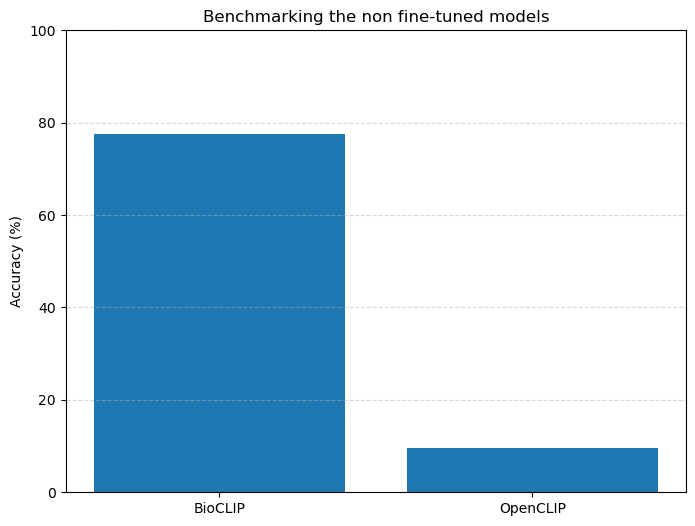

In [8]:
scores = {
    'BioCLIP': acc_bioclip,
    'OpenCLIP': acc_openclip
}

plt.figure(figsize=(8, 6))
plt.bar(scores.keys(), scores.values())
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Benchmarking the non fine-tuned models')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()